In [ ]:
# How many of the Top 200 songs are the same between the US and globally over the past two months?


In [47]:
# Dependencies and 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from datetime import datetime, timedelta
from scipy.stats import linregress

# data files
US_path = "Combined CSVs/US_combined.csv"
Global_path = "Combined CSVs/Global_combined.csv"

# Read the mouse data and the study results
us_data = pd.read_csv(US_path)
global_data = pd.read_csv(Global_path)


In [48]:
# temp - display record counts and data types of rows in US data
print (f"Records in US data: {len(us_data)}")
us_data.dtypes

Records in US data: 10451


Position      object
Track Name    object
Artist        object
Streams       object
URL           object
Date          object
Unique ID     object
dtype: object

In [139]:
# create unique Artist Track field and display column headers in US data
us_data["ArtistTrack"] = us_data["Artist"] + us_data["Track Name"]
us_data.head()


,Position,Track Name,Artist,Streams,URL,Date,Unique ID,year,month_day,reformatted date,ArtistTrack
0,1,The Box,Roddy Ricch,12533419,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,01.02.20,01.02.20_001,20,01.02,20.01.02,Roddy RicchThe Box
1,2,ROXANNE,Arizona Zervas,9844160,https://open.spotify.com/track/696DnlkuDOXcMAn...,01.02.20,01.02.20_002,20,01.02,20.01.02,Arizona ZervasROXANNE
2,3,Circles,Post Malone,7932216,https://open.spotify.com/track/21jGcNKet2qwijl...,01.02.20,01.02.20_003,20,01.02,20.01.02,Post MaloneCircles
3,4,BOP,DaBaby,7560429,https://open.spotify.com/track/6Ozh9Ok6h4Oi1wU...,01.02.20,01.02.20_004,20,01.02,20.01.02,DaBabyBOP
4,5,Falling,Trevor Daniel,7197448,https://open.spotify.com/track/4TnjEaWOeW0eKTK...,01.02.20,01.02.20_005,20,01.02,20.01.02,Trevor DanielFalling


In [50]:
# temp - value counts to determine if there are headers in the data rows
us_data["Position"].value_counts()

109         52
63          52
101         52
102         52
83          52
            ..
120         52
186         52
21          52
39          52
Position    51
Name: Position, Length: 201, dtype: int64

In [51]:
# temp
# drop headers in data and convert Streams to integer - US data
us_data.drop(us_data[us_data.Position == "Position"].index, inplace=True)
us_data["Position"] = us_data["Position"].astype(int)
us_data["Streams"] = us_data["Streams"].astype(int)
us_data["Artist"] = us_data["Artist"].str.replace('$','S')
us_data["Track Name"] = us_data["Track Name"].str.replace('$','S')

print (f"Records in US data after dropping duplicate headers: {len(us_data)}")
us_data.dtypes

Records in US data after dropping duplicate headers: 10400


Position       int32
Track Name    object
Artist        object
Streams        int32
URL           object
Date          object
Unique ID     object
dtype: object

In [53]:
# temp - display record counts and data types of rows in US data
print (f"Records in Global data: {len(global_data)}")
global_data.dtypes

Records in Global data: 10451


Position      object
Track Name    object
Artist        object
Streams       object
URL           object
Date          object
Unique ID     object
dtype: object

In [140]:
# create unique Artist Track field and display column headers in Global data
global_data["ArtistTrack"] = global_data["Artist"] + global_data["Track Name"]
global_data.head()

,Position,Track Name,Artist,Streams,URL,Date,Unique ID,year,month_day,reformatted date,ArtistTrack
0,50183626,Dance Monkey,Tones And I,50183626,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,01.02.20,01.02.20_001,20,01.02,20.01.02,Tones And IDance Monkey
1,33254585,ROXANNE,Arizona Zervas,33254585,https://open.spotify.com/track/696DnlkuDOXcMAn...,01.02.20,01.02.20_002,20,01.02,20.01.02,Arizona ZervasROXANNE
2,29349573,Tusa,KAROL G,29349573,https://open.spotify.com/track/7k4t7uLgtOxPwTp...,01.02.20,01.02.20_003,20,01.02,20.01.02,KAROL GTusa
3,26067853,Memories,Maroon 5,26067853,https://open.spotify.com/track/2b8fOow8UzyDFAE...,01.02.20,01.02.20_004,20,01.02,20.01.02,Maroon 5Memories
4,25901488,Falling,Trevor Daniel,25901488,https://open.spotify.com/track/4TnjEaWOeW0eKTK...,01.02.20,01.02.20_005,20,01.02,20.01.02,Trevor DanielFalling


In [55]:
# temp - value counts to determine if there are headers in the data rows
global_data["Position"].value_counts()

109         52
63          52
101         52
102         52
83          52
            ..
120         52
186         52
21          52
39          52
Position    51
Name: Position, Length: 201, dtype: int64

In [56]:
# temp
# drop headers in data and convert Streams to integer - Global data
global_data.drop(global_data[global_data.Position == "Position"].index, inplace=True)
global_data["Position"] = global_data["Streams"].astype(int)
global_data["Streams"] = global_data["Streams"].astype(int)
global_data["Artist"] = global_data["Artist"].str.replace('$','S')
global_data["Track Name"] = global_data["Track Name"].str.replace('$','S')


print (f"Records in US data after dropping duplicate headers: {len(global_data)}")
global_data.dtypes

Records in US data after dropping duplicate headers: 10400


Position       int32
Track Name    object
Artist        object
Streams        int32
URL           object
Date          object
Unique ID     object
dtype: object

In [57]:
print("Input counts:")
us_data_recs_in = len(us_data)
global_data_recs_in = len(global_data)
print(f"rows in us: {us_data_recs_in}")
print(f"rows in global: {global_data_recs_in}")

us_dates_in = us_data["Date"].value_counts()
global_dates_in = global_data["Date"].value_counts()
print(f"unique dates in us: {len(us_dates_in)}")
print(f"unique dates in global: {len(global_dates_in)}")
     

Input counts:
rows in us: 10400
rows in global: 10400
unique dates in us: 52
unique dates in global: 52


In [58]:
# get current date and format to compare to date from input (mm.dd.yy)

#
# Don't think I need this cell, but keep for the time being - pull into reference do for future use
#


full_year = datetime.today().strftime('%Y')
month_day = datetime.today().strftime('%m.%d')

# examples for confirming how string parsing works - keep in place for the time being
month_day2 = month_day[2:]
month_day3 = month_day[:3]
#print (f"month_day: {month_day}")
#print (f"month_day2: {month_day2}")
#print (f"month_day3: {month_day3}")

todays_date = f"{month_day}.{full_year[2:]}"
print (todays_date)

11.01.20


In [59]:
# Get date to use for pulling last 2 months of data
#print(datetime.today())
print (datetime.today() + timedelta(days=-60))

compare_year = (datetime.today() + timedelta(days=-60)).strftime('%Y')
compare_month_day = (datetime.today() + timedelta(days=-60)).strftime('%m.%d')

compare_date = f"{compare_year[2:]}.{compare_month_day}"
print(compare_date)


2020-09-02 15:55:21.836051
20.09.02


In [60]:
# reformat date from input for sorting/comparison

# US Data
us_data["year"] = [x.strip()[-2:] for x in us_data['Date']]
# strip [5:] does the same thing as strip [-2:] with the Date field, use [:5] to pull first 5 characters
# keep for now but move to reference doc for future use
#us_data["month_day"] = [x.strip()[5:] for x in us_data['Date']]
us_data["month_day"] = [x.strip()[:5] for x in us_data['Date']]
us_data["reformatted date"] = us_data["year"] + "." + us_data["month_day"]
us_data.head()

# Global Data
global_data['Date'] = global_data['Date'].astype(str)
global_data["year"] = [x.strip()[-2:] for x in global_data['Date']]
global_data["month_day"] = [x.strip()[:5] for x in global_data['Date']]
global_data["reformatted date"] = global_data["year"] + "." + global_data["month_day"]
global_data.tail()
us_data.tail()

,Position,Track Name,Artist,Streams,URL,Date,Unique ID,year,month_day,reformatted date
10446,196,Juicy,Doja Cat,1920454,https://open.spotify.com/track/7f5trao56t7sB7f...,12.26.19,12.26.19_196,19,12.26,19.12.26
10447,197,To Be So Lonely,Harry Styles,1912267,https://open.spotify.com/track/5JiH89mHrv9oWHl...,12.26.19,12.26.19_197,19,12.26,19.12.26
10448,198,XO Tour Llif3,Lil Uzi Vert,1902239,https://open.spotify.com/track/7GX5flRQZVHRAGd...,12.26.19,12.26.19_198,19,12.26,19.12.26
10449,199,Happier,Marshmello,1899623,https://open.spotify.com/track/2dpaYNEQHiRxtZb...,12.26.19,12.26.19_199,19,12.26,19.12.26
10450,200,Shotta Flow (feat. Blueface) [Remix],NLE Choppa,1899350,https://open.spotify.com/track/5BJMeoCXXgbRAWf...,12.26.19,12.26.19_200,19,12.26,19.12.26


In [61]:
print("Counts after date conversion:")
print("")

us_data_recs_chk1 = len(us_data)
global_data_recs_chk1 = len(global_data)
print(f"rows in us: {us_data_recs_chk1}")
print(f"rows in global: {global_data_recs_chk1}")

us_dates_chk1 = us_data["Date"].value_counts()
global_dates_chk1 = global_data["Date"].value_counts()
print(f"unique dates in us: {len(us_dates_chk1)}")
print(f"unique dates in global: {len(global_dates_chk1)}")



Counts after date conversion:

rows in us: 10400
rows in global: 10400
unique dates in us: 52
unique dates in global: 52


In [62]:
# sanity check

us_recs_aft_cnv = len(us_data["Date"].value_counts())
global_recs_aft_cnv = len(global_data["Date"].value_counts())

#print(f"unique dates in us after date conversion: {len(len(us_data["Date"].value_counts())}")
print(f"unique dates in us after conversion: {us_recs_aft_cnv}")
print(f"unique dates in global after conversion: {global_recs_aft_cnv}")

us_data_recs_1 = len(us_data)
global_data_recs_1 = len(global_data)
print(f"rows in us: {us_data_recs_1}")
print(f"rows in global: {global_data_recs_1}")

us_dates_1 = us_data["Date"].value_counts()
global_dates_1 = global_data["Date"].value_counts()
print(f"unique dates in us: {len(us_dates_1)}")
print(f"unique dates in global: {len(global_dates_1)}")

unique dates in us after conversion: 52
unique dates in global after conversion: 52
rows in us: 10400
rows in global: 10400
unique dates in us: 52
unique dates in global: 52


In [63]:
# Identify unique song/artists from the past 2 months: US & Global
# For each unique song/artist identify min & max position and total streams
# What's the total population of unique song/artists in each dataset?
# How many unique song/artists are common between datasets?
# What percent of total dataset do the common song/artists comprise?
# Does statistical analysis of the datasets provide insight?

In [154]:
# create summary dataframes for comparing US to Global

us_groupby = us_data.groupby(["ArtistTrack"])
us_track_df = pd.DataFrame(us_groupby["Artist"].max())
us_track_df["Track Name"] = us_groupby["Track Name"].max()
us_track_df["Weeks in Top 200"] = us_groupby["Position"].count()
us_track_df["Top Position"] = us_groupby["Position"].min()
us_track_df["Low Position"] = us_groupby["Position"].max()

global_groupby = global_data.groupby(["ArtistTrack"])
global_track_df = pd.DataFrame(global_groupby["Artist"].max())
global_track_df["Track Name"] = global_groupby["Track Name"].max()
global_track_df["Weeks in Top 200"] = global_groupby["Position"].count()
global_track_df["Top Position"] = global_groupby["Position"].min()
global_track_df["Low Position"] = global_groupby["Position"].max()

global_track_df.head()

,Artist,Track Name,Weeks in Top 200,Top Position,Low Position
ArtistTrack,,,,,
"*NSYNCMerry Christmas, Happy Holidays",*NSYNC,"Merry Christmas, Happy Holidays",1,7972211,7972211
13 OrganiséBande organisée,13 Organisé,Bande organisée,2,5112572,5706019
21 SavageBrand New Draco,21 Savage,Brand New Draco,1,5841110,5841110
21 SavageGlock In My Lap,21 Savage,Glock In My Lap,2,4947593,10620418
21 SavageImmortal,21 Savage,Immortal,3,4851870,7793151


In [157]:
common_track_df = pd.merge(us_track_df, global_track_df, how='inner', on='ArtistTrack', suffixes=('_US', '_GL'))
common_track_df.head()

,Artist_US,Track Name_US,Weeks in Top 200_US,Top Position_US,Low Position_US,Artist_GL,Track Name_GL,Weeks in Top 200_GL,Top Position_GL,Low Position_GL
ArtistTrack,,,,,,,,,,
"*NSYNCMerry Christmas, Happy Holidays",*NSYNC,"Merry Christmas, Happy Holidays",2,97,162,*NSYNC,"Merry Christmas, Happy Holidays",1,7972211,7972211
21 SavageBrand New Draco,21 Savage,Brand New Draco,1,35,35,21 Savage,Brand New Draco,1,5841110,5841110
21 SavageGlock In My Lap,21 Savage,Glock In My Lap,3,8,57,21 Savage,Glock In My Lap,2,4947593,10620418
21 SavageImmortal,21 Savage,Immortal,13,14,165,21 Savage,Immortal,3,4851870,7793151
21 SavageMany Men,21 Savage,Many Men,3,15,186,21 Savage,Many Men,1,8675173,8675173


In [198]:
def print_scatterchart(x_axis, y_axis, title, x_label, y_label):
    
    fig = plt.figure()
    plt.scatter(x_axis, y_axis, marker="o", facecolors="darkblue")
    fig.suptitle(title, fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [201]:
def print_scatter_and(x_axis, y_axis, title, x_label, y_label):
# print scatter charter and regression analsysi

    # make x_axis amenable to calculation of regression values
    x_axis = np.asarray(x_axis)
    
    # run linregress to get components for correlaton coefficient and regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,  y_axis)
    regress_values = x_axis * slope + intercept

    # calc correlation coefficient and format regression model equation
    correlation_coefficient = round(rvalue**2, 2)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # figure out where to place the regression model equation
    test_val = (slope*max(x_axis) + intercept) - (slope*min(x_axis) + intercept)
    x_pos = min(x_axis)
    if test_val > 0:
        if max(y_axis) > 25:
            y_pos = max(y_axis) - 5
        else:
            y_pos = max(y_axis) - 1
    else:
        if max(y_axis) > 25:
            y_pos = min(y_axis) + 5
        else:
            y_pos = min(y_axis) + 1

    # format and print plot
    fig = plt.figure()
    plt.scatter(x_axis, y_axis, marker="o", facecolors="#79abcd")
    plt.plot(x_axis,regress_values,"#f70d30")
    plt.annotate(line_eq,(x_pos,y_pos),fontsize=15,color="#f70d30",fontweight="bold")
    fig.suptitle(title, fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    print(f'Correlation coefficient = {correlation_coefficient}')
    print('')

The US Top 200 chart contains 1302 songs
The Global Top 200 chart contains 1140 songs
829 songs are common across both charts

The artist with the most songs on both charts is Lil Uzi Vert with 33 songs
There were 26 songs that stayed in the US Top 200 for 52 weeks
There were 23 songs that stayed in the Global Top 200 for 52 weeks
There were 13 songs that stayed in the both charts for 52 weeks


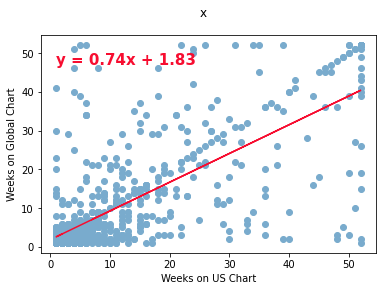

Correlation coefficient = 0.56




In [202]:
print(f"The US Top 200 chart contains {len(us_track_df)} songs")
print(f"The Global Top 200 chart contains {len(global_track_df)} songs")
print(f"{len(common_track_df)} songs are common across both charts")
print("")

Artist_with_most_songs = common_track_df["Artist_US"].mode()
if len(Artist_with_most_songs) == 1:
    ArtistX = Artist_with_most_songs[0]
    SongsX_df = common_track_df.loc[common_track_df["Artist_US"] == Artist_with_most_songs[0]]
    print(f"The artist with the most songs on both charts is {Artist_with_most_songs[0]} with {len(SongsX_df)} songs")

# Identify songs with longest run in each chart
longest_run_US = common_track_df["Weeks in Top 200_US"].max()
longest_run_GL = common_track_df["Weeks in Top 200_GL"].max()
longest_run_songs_US_df = common_track_df.loc[common_track_df["Weeks in Top 200_US"] == longest_run_US]
longest_run_songs_GL_df = common_track_df.loc[common_track_df["Weeks in Top 200_GL"] == longest_run_GL]

print(f"There were {len(longest_run_songs_US_df)} songs that stayed in the US Top 200 for {longest_run_US} weeks")
print(f"There were {len(longest_run_songs_GL_df)} songs that stayed in the Global Top 200 for {longest_run_US} weeks")

common_longest_df = pd.merge(longest_run_songs_US_df, longest_run_songs_GL_df, how='inner', on='ArtistTrack')
len(common_longest_df)

if longest_run_US > longest_run_GL:
    print(f"There were {len(common_longest_df)} songs that stayed in the both charts for {longest_run_US} weeks")
else:
    print(f"There were {len(common_longest_df)} songs that stayed in the both charts for {longest_run_GL} weeks")

# Temperature vs. Latitude
print_scatter_and(common_track_df["Weeks in Top 200_US"], common_track_df["Weeks in Top 200_GL"], "x", "Weeks on US Chart", "Weeks on Global Chart")
print("")